In [1]:
import pandas as pd
import re

# --- Carga de Datos ---
pib_df = pd.read_csv("data_2025/pib2020-2025.csv")
who_df = pd.read_csv("data_2025/WHO_life_expectancy.csv")

# --- 1.1 Limpiar datos de Expectativa de Vida (WHO) ---
# Extraer el valor numérico de la columna 'Value'
who_df['Life_Expectancy'] = who_df['Value'].astype(str).str.extract(r"(\d+\.?\d*)").astype(float)

# Filtrar para 'Life expectancy at birth (years)', 'Both sexes', y '2021'
who_df_filtered = who_df[
    (who_df['Indicator'] == 'Life expectancy at birth (years)') &
    (who_df['Dim1'] == 'Both sexes')
]
who_df_2021 = who_df_filtered[who_df_filtered['Period'] == 2021].copy()

# Seleccionar y renombrar columnas
life_exp_2021 = who_df_2021[['Location', 'Life_Expectancy']].rename(columns={'Location': 'Country'})
life_exp_2021 = life_exp_2021.dropna()

# --- 1.2 Limpiar datos del PIB (PIB) ---
# Asegurarnos de que la columna '2021' sea numérica
pib_df['2021_numeric'] = pd.to_numeric(pib_df['2021'], errors='coerce')

# Seleccionar y renombrar columnas
gdp_2021 = pib_df[['Country', '2021_numeric']].rename(columns={'2021_numeric': 'GDP_2021'})
gdp_2021 = gdp_2021.dropna()

# --- 1.3 Unir los DataFrames ---
merged_df = pd.merge(gdp_2021, life_exp_2021, on='Country', how='inner')
merged_df = merged_df.dropna()

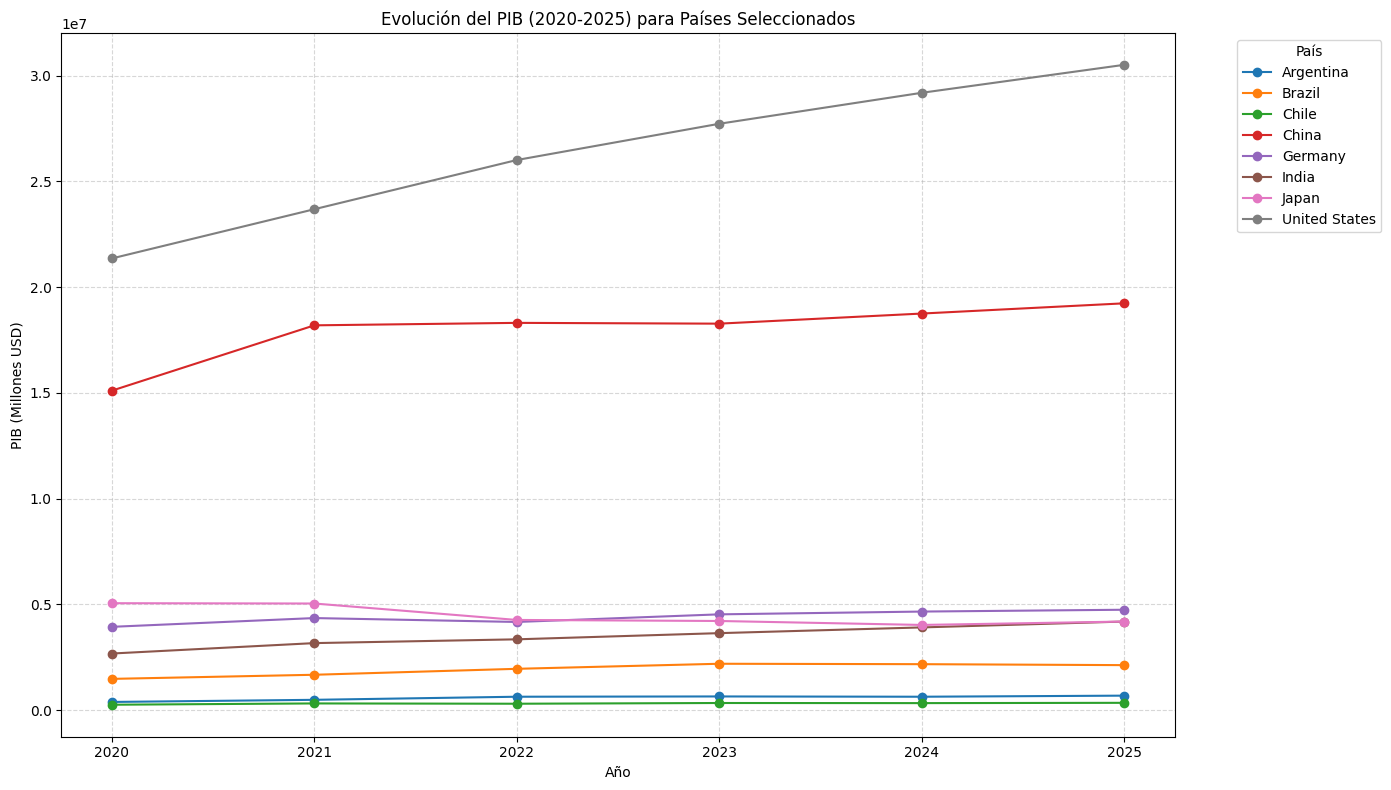

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Preparar datos (melt) ---
year_cols = ['2020', '2021', '2022', '2023', '2024', '2025']
for col in year_cols:
    pib_df[col] = pd.to_numeric(pib_df[col], errors='coerce')
    
pib_melted = pib_df.melt(id_vars=['Country'], value_vars=year_cols, var_name='Year', value_name='GDP')
pib_melted = pib_melted.dropna()
pib_melted['Year'] = pib_melted['Year'].astype(str)

# --- Seleccionar países y pivotear ---
countries_to_plot = ['United States', 'China', 'Germany', 'Japan', 'India', 'Brazil', 'Argentina', 'Chile']
pib_filtered_melted = pib_melted[pib_melted['Country'].isin(countries_to_plot)]

# Pivotear la tabla: Años como filas (index), Países como columnas
pib_pivot = pib_filtered_melted.pivot_table(index='Year', columns='Country', values='GDP')

# --- Graficar ---
# Usar el .plot() integrado de Pandas (que usa Matplotlib)
ax = pib_pivot.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('Evolución del PIB (2020-2025) para Países Seleccionados')
plt.xlabel('Año')
plt.ylabel('PIB (Millones USD)')
# Mover la leyenda fuera del área del gráfico
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

plt.savefig("matplotlib_lineplot_gdp_trends.png")
plt.clf()